In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
print("done")

done


In [126]:
df = pd.read_csv("C:/Users/pc1/Downloads/archive (1)/genres_v2.csv")

C:\Users\pc1\AppData\Local\Temp\ipykernel_1412\1844438606.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/pc1/Downloads/archive (1)/genres_v2.csv")


In [127]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [128]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [129]:
df.shape

(42305, 22)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [131]:
#Remove unwanted columns
df = df.drop(["type","id","uri","track_href","analysis_url","song_name","Unnamed: 0","title", "duration_ms", "time_signature"
              ,"mode"], axis =1)

<Axes: >

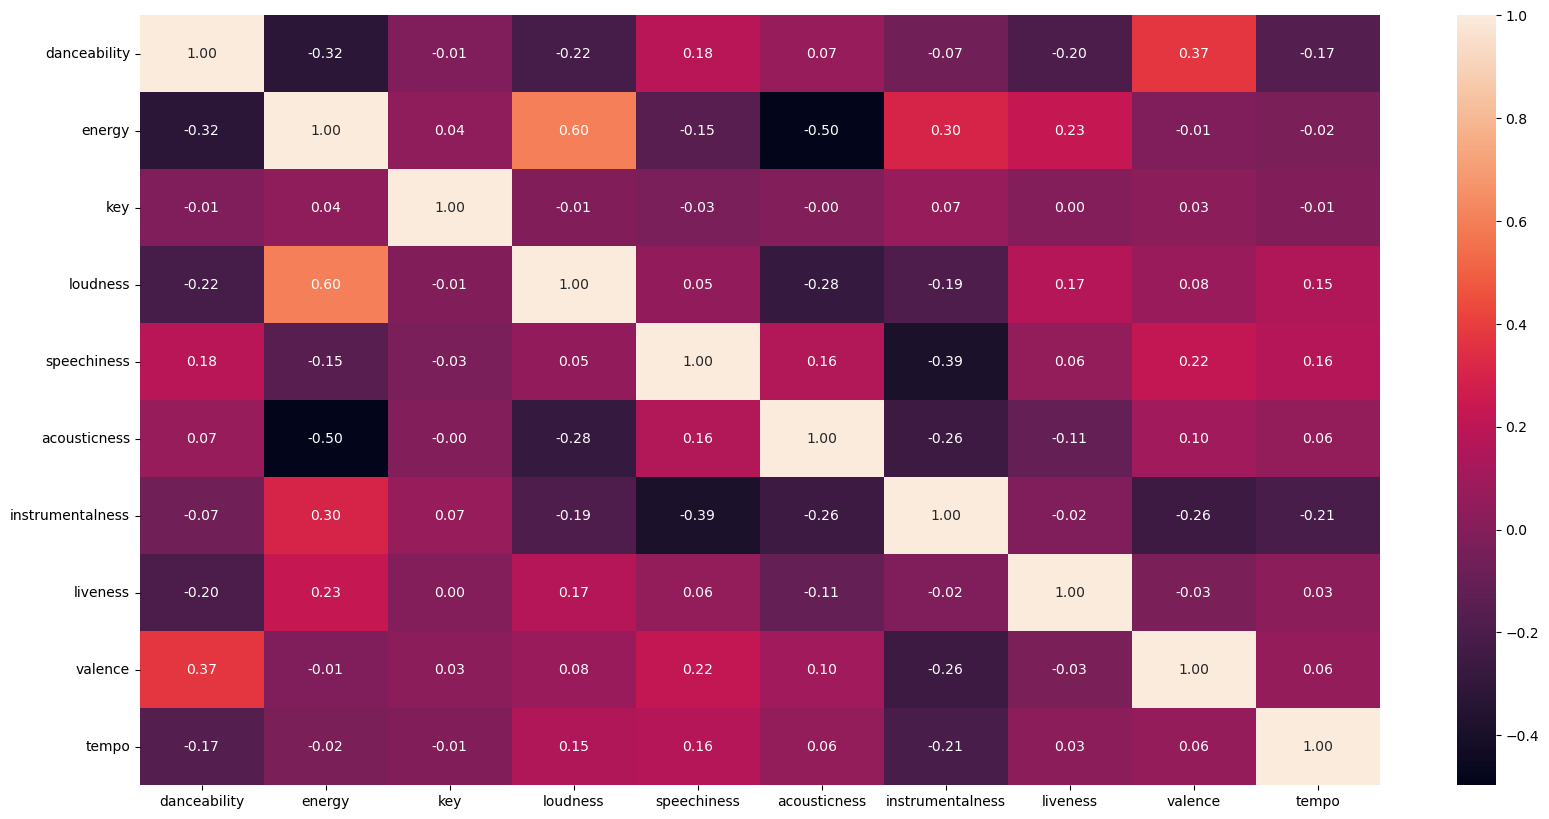

In [132]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')

In [133]:
df["genre"].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

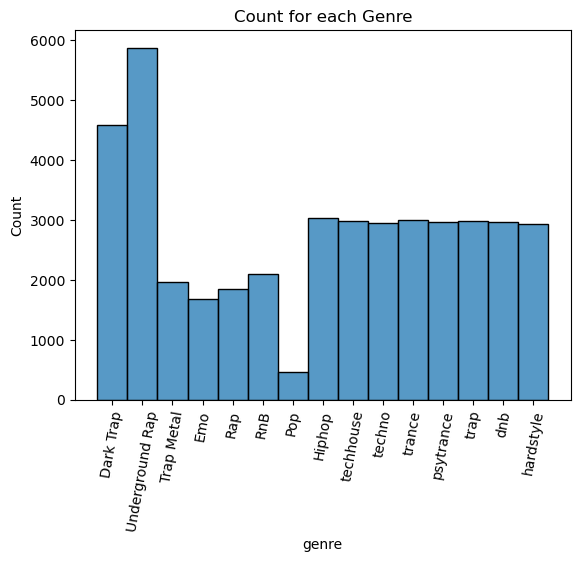

In [134]:
hist_plot = sns.histplot(df["genre"])
x = plt.xticks(rotation=80)
title = plt.title("Count for each Genre")

In [135]:
df.isnull().sum(axis=0)

danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [136]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers


In [137]:
dance_outliers = find_outliers_IQR(df['danceability'])
print('Number of outliers of danceability: '+ str(len(dance_outliers)))

loud_outliers = find_outliers_IQR(df['loudness'])
print('Number of outliers of loudness: '+ str(len(loud_outliers)))

key_outliers = find_outliers_IQR(df['key'])
print('Number of outliers of key: '+ str(len(key_outliers)))

energy_outliers = find_outliers_IQR(df['energy'])
print('Number of outliers of energy: '+ str(len(energy_outliers)))

liveness_outliers = find_outliers_IQR(df['liveness'])
print('Number of outliers of liveness: '+ str(len(liveness_outliers)))

instrumentalness_outliers = find_outliers_IQR(df['instrumentalness'])
print('Number of outliers of instrumentalness: '+ str(len(instrumentalness_outliers)))

acousticness_outliers = find_outliers_IQR(df['acousticness'])
print('Number of outliers of acousticness: '+ str(len(acousticness_outliers)))

speech_outliers = find_outliers_IQR(df['speechiness'])
print('Number of outliers of speechiness: '+ str(len(speech_outliers)))

valence_outliers = find_outliers_IQR(df['valence'])
print('Number of outliers of valence: '+ str(len(valence_outliers)))

tempo_outliers = find_outliers_IQR(df['tempo'])
print('Number of outliers of tempo: '+ str(len(tempo_outliers)))



Number of outliers of danceability: 45
Number of outliers of loudness: 796
Number of outliers of key: 0
Number of outliers of energy: 139
Number of outliers of liveness: 2496
Number of outliers of instrumentalness: 0
Number of outliers of acousticness: 5149
Number of outliers of speechiness: 1918
Number of outliers of valence: 0
Number of outliers of tempo: 532


In [138]:
# Removing outliers
Q1 = df['acousticness'].quantile(0.25)
Q3 = df['acousticness'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds of the IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the column
df = df[(df['acousticness'] >= lower_bound) & (df['acousticness'] <= upper_bound)]

In [139]:
Q1 = df['energy'].quantile(0.25)
Q3 = df['energy'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['energy'] >= lower_bound) & (df['energy'] <= upper_bound)]

In [140]:
Q1 = df['loudness'].quantile(0.25)
Q3 = df['loudness'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['loudness'] >= lower_bound) & (df['loudness'] <= upper_bound)]

In [141]:
Q1 = df['danceability'].quantile(0.25)
Q3 = df['danceability'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['danceability'] >= lower_bound) & (df['danceability'] <= upper_bound)]

In [142]:
Q1 = df['liveness'].quantile(0.25)
Q3 = df['liveness'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['liveness'] >= lower_bound) & (df['liveness'] <= upper_bound)]

In [143]:
Q1 = df['speechiness'].quantile(0.25)
Q3 = df['speechiness'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['speechiness'] >= lower_bound) & (df['speechiness'] <= upper_bound)]

In [144]:
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['tempo'] >= lower_bound) & (df['tempo'] <= upper_bound)]

In [145]:
df.shape

(31976, 11)

In [146]:
#Count for each genre before label encoder
df["genre"].value_counts()

genre
Underground Rap    3659
Dark Trap          2968
techhouse          2869
dnb                2747
trance             2652
techno             2611
hardstyle          2576
psytrance          2535
trap               2234
Hiphop             1859
Emo                1294
RnB                1268
Trap Metal         1261
Rap                1104
Pop                 339
Name: count, dtype: int64

In [147]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['genre']= label_encoder.fit_transform(df['genre'])
  
df['genre'].unique()
print(df.head())

    danceability  energy  key  loudness  speechiness  acousticness  \
3          0.476   0.781    0    -4.710       0.1030        0.0237   
4          0.798   0.624    2    -7.668       0.2930        0.2170   
6          0.718   0.668    8    -4.162       0.1370        0.0254   
7          0.694   0.711    8    -5.525       0.2210        0.0397   
10         0.864   0.365    8   -10.219       0.0655        0.1870   

    instrumentalness  liveness  valence    tempo  genre  
3             0.0000     0.114   0.1750  186.948      0  
4             0.0000     0.166   0.5910  147.988      0  
6             0.0078     0.124   0.0380  130.826      0  
7             0.0000     0.112   0.2830  138.049      0  
10            0.0000     0.116   0.0478  189.938      0  


In [148]:
#Count for each genre after label encoder
df["genre"].value_counts()

genre
7     3659
0     2968
11    2869
8     2747
13    2652
12    2611
9     2576
10    2535
14    2234
2     1859
1     1294
5     1268
6     1261
4     1104
3      339
Name: count, dtype: int64

In [149]:
x = df.drop(['genre'], axis=1)
y = df['genre']

In [151]:
#Split data into feature and target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [152]:
# Create a Random Forest classifier
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6727642276422764


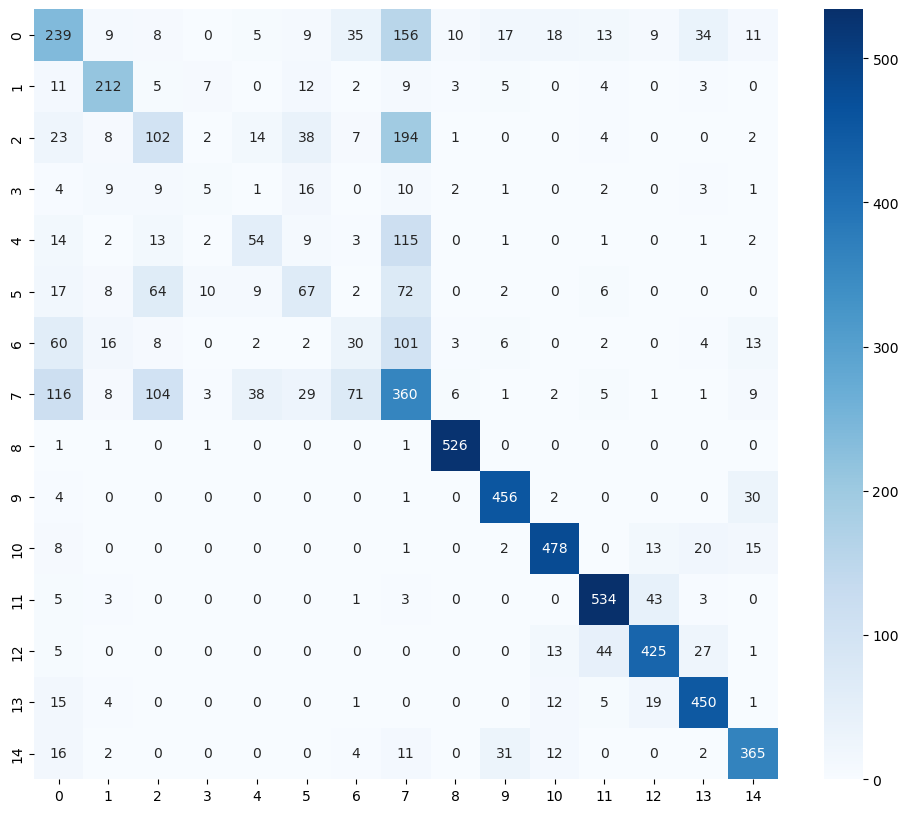

In [153]:
cm = confusion_matrix(y_test, y_pred)

fig = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")